# ALS and FTD Project

downloading R language

In [1]:
conda install -c r r-essentials

Error while loading conda entry point: anaconda-cloud-auth (cannot import name 'ChannelAuthBase' from 'conda.plugins.types' (/Users/juliatran/anaconda3/lib/python3.11/site-packages/conda/plugins/types.py))
Error while loading conda entry point: anaconda-cloud-auth (cannot import name 'ChannelAuthBase' from 'conda.plugins.types' (/Users/juliatran/anaconda3/lib/python3.11/site-packages/conda/plugins/types.py))
Retrieving notices: ...working... done
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - r-essentials

Current channels:

  - https://conda.anaconda.org/r/osx-arm64
  - https://conda.anaconda.org/r/noarch
  - https://repo.anaconda.com/pkgs/main/osx-arm64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-ar

In [8]:
%%bash

R --vanilla --no-save


R version 4.3.2 (2023-10-31) -- "Eye Holes"
Copyright (C) 2023 The R Foundation for Statistical Computing
Platform: aarch64-apple-darwin20 (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> 


## Excel Sheet for Clinical Trials

Excel sheet with all of the info for the clinical trials of ALS & FTD

In [3]:
import pandas as pd

In [4]:
pwd

'/Users/juliatran/Lab Notebook'

In [24]:
pd.read_excel('/Users/juliatran/Lab Notebook/clinical trials - ALS & FTD.xlsx')

Trial ID                                  Protocol/Trial ID  \
0      515031      NCT06395038\nPRO00037661\nTrialTroveID-515031   
1      514876                             23-011476\nNCT06392126   
2      514860                 HX-A-2023027\nNATURAL\nNCT06391645   
3      513758  CTR20240913\nTrialTroveID-513758\nYYAA1-BLZ-24008   
4      513721                                TrialTroveID-513721   
..        ...                                                ...   
957     77401  07-AVR-123\nHUM00016766\nNA_00014202\nNCT00573...   
958     48557                                TrialTroveID-048557   
959     23032                                TrialTroveID-023032   
960     14876                                TrialTroveID-014876   
961      5588       02-AVR-107\nNCT00056524\nTrialTroveID-005588   

                                           Trial Title Trial Phase  \
0    A Phase I Clinical Trial, Using Interleukin-2 ...           I   
1    An Open-label Study of an Experimental Antisen...        I/II   
2    Nerve Growth Factor Encapsulated With 2-methac...      II/III   
3    A single-dose, randomized, open-label, two-cyc...           I   
4       A Global Phase III study of Pridopidine in ALS         III   
..                                                 ...         ...   
957  A Double-Blind, Randomized, Placebo-Controlled...         III   
958                            Phase II Trial of VP025          II   
959                   Phase I Clinical Trial of VP025.           I   
960  The Effect of Aniracetam, Either as Monotherap...          II   
961  An Open-Label Multicenter Study to Assess the ...         III   

    Trial Status Therapeutic Area  \
0           Open              CNS   
1         Closed       Unassigned   
2        Planned       Unassigned   
3        Planned              CNS   
4        Planned              CNS   
..           ...              ...   
957    Completed              CNS   
958   Terminated              CNS   
959    Completed              CNS   
960    Completed              CNS   
961   Terminated              CNS   

                                               Disease  \
0                      CNS: Dementia (non-Alzheimer's)   
1                                           Unassigned   
2                                           Unassigned   
3    CNS: Amyotrophic Lateral Sclerosis; CNS: Cereb...   
4                   CNS: Amyotrophic Lateral Sclerosis   
..                                                 ...   
957  CNS: Amyotrophic Lateral Sclerosis; CNS: Multi...   
958  CNS: Alzheimer's Disease; CNS: Amyotrophic Lat...   
959  CNS: Alzheimer's Disease; CNS: Amyotrophic Lat...   
960  CNS: Alzheimer's Disease; CNS: Dementia (non-A...   
961  CNS: Alzheimer's Disease; CNS: Amyotrophic Lat...   

                                       Patient Segment  \
0                              Frontotemporal Dementia   
1                                                  NaN   
2                                                  NaN   
3                              (N/A); Healthy subjects   
4                                          Unspecified   
..                                                 ...   
957                                     Symptom relief   
958                                 (N/A); Unspecified   
959                                   Healthy subjects   
960  Cognitive Function; Frontotemporal Dementia; M...   
961  Behavioral Symptoms - Other; Non-motor symptom...   

                                             MeSH Term    Record Type  ...  \
0                    Dementia; Frontotemporal Dementia     Trialtrove  ...   
1    Amyotrophic Lateral Sclerosis; Motor Neuron Di...  Registry Only  ...   
2    Amyotrophic Lateral Sclerosis; Motor Neuron Di...  Registry Only  ...   
3    Amyotrophic Lateral Sclerosis; Cerebral Palsy;...     Trialtrove  ...   
4    Amyotrophic Lateral Sclerosis; Motor Neuron Di...     Trialtrove  ...   
..                                      

## Look at Trial Status with R

Removal of nonspecific phases

In [ ]:
# Removal of Non-specified stages
data1 <- filter(data, Trial.Phase != "Other")
data2 <-filter(data1, Trial.Phase != "(N/A)")

view(data2)



In [ ]:
# Replace of in-between stages
data_1 <- replace(data2, "I/II", "II")

data <- data2 %>% mutate (Trial.Phase = ifelse(Trial.Phase == "I/II", "II",
                                             ifelse(Trial.Phase == "II/III", "III",
                                                   ifelse(Trial.Phase == "II", "II",
                                                          ifelse(Trial.Phase == "I", "I",
                                                                 ifelse(Trial.Phase == "III", "III",
                                                                        ifelse(Trial.Phase == "IV", "IV", "N/A")))))))
view(data)

Deem each case as either "Successful", "Failure", or "Ongoing"
- Completed & Open = Successful
- Terminated = Failure
- Temporarily Closed & Planned = Ongoing

In [7]:
setwd("/Users/juliatran/Desktop/neuro lab/ALS & dementia/studies")


library(data.table)
library(tidyverse)

df <- read.csv("ALS & FTD clinical trials.csv")
head(df)
view(df)
colnames(df)
args(df)



data <- df %>% mutate (Trial.Status = ifelse(Trial.Status == "Open", "Success",
                                             ifelse(Trial.Status == "Planned", "Ongoing",
                                               ifelse(Trial.Status == "Completed", "Success",
                                                ifelse(Trial.Status == "Terminated", "Failure",
                                                 ifelse(Trial.Status == "Temporarily Closed", "Ongoing",
                                                 ifelse(Trial.Status == "Closed", "Failure", "N/A")))))))

view(data)


SyntaxError: invalid syntax (3763645400.py, line 15)

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('ALS&FTD_trial_status.csv')

In [22]:
print(df)

     Trial.ID                                  Protocol.Trial.ID  \
0      515031      NCT06395038\nPRO00037661\nTrialTroveID-515031   
1      514876                             23-011476\nNCT06392126   
2      514860                 HX-A-2023027\nNATURAL\nNCT06391645   
3      513758  CTR20240913\nTrialTroveID-513758\nYYAA1-BLZ-24008   
4      513721                                TrialTroveID-513721   
..        ...                                                ...   
957     77401  07-AVR-123\nHUM00016766\nNA_00014202\nNCT00573...   
958     48557                                TrialTroveID-048557   
959     23032                                TrialTroveID-023032   
960     14876                                TrialTroveID-014876   
961      5588       02-AVR-107\nNCT00056524\nTrialTroveID-005588   

                                           Trial.Title Trial.Phase  \
0    A Phase I Clinical Trial, Using Interleukin-2 ...           I   
1    An Open-label Study of an Experimental

## Counted how many Successes, Failures, and Ongoing cases

In [23]:
data %>% count(Trial.Status)

SyntaxError: invalid syntax (2126950214.py, line 1)

- Failure 179
- Ongoing  71
- Success 712

Counted how many successes, failures, and ongoing cases in each phase

In [ ]:
# Count how many trial statuses are in each phase
sum(data$Trial.Status== 'Success' & data$Trial.Phase == "I")
sum(data$Trial.Status== 'Success' & data$Trial.Phase == "II")
sum(data$Trial.Status== 'Success' & data$Trial.Phase == "III")
sum(data$Trial.Status== 'Success' & data$Trial.Phase == "IV")

sum(data$Trial.Status== 'Failure' & data$Trial.Phase == "I")
sum(data$Trial.Status== 'Failure' & data$Trial.Phase == "II")
sum(data$Trial.Status== 'Failure' & data$Trial.Phase == "III")
sum(data$Trial.Status== 'Failure' & data$Trial.Phase == "IV")

sum(data$Trial.Status== 'Ongoing' & data$Trial.Phase == "I")
sum(data$Trial.Status== 'Ongoing' & data$Trial.Phase == "II")
sum(data$Trial.Status== 'Ongoing' & data$Trial.Phase == "III")
sum(data$Trial.Status== 'Ongoing' & data$Trial.Phase == "IV")

## Endpoint Determination

With the use of Trial ID, Sponsor, Trial Phase, Primary Tested Drug, Primary Endpoint, Primary Endpoint Details, and Secondary Endpoints; we were able to determine if the endpoint is primary secondary.

Primary - the treatment of ALS or FTD

Secondary - the treatment of a symptom associated with ALS or FTD

In [1]:
# Creating new table for endpoint

setwd("/Users/juliatran/Desktop/neuro lab/ALS & dementia/studies")

sponsor <- read.csv("clinical trials - ALS & FTD.csv")

print(names(sponsor))  

selected_columns <- sponsor[, c("Trial.ID", "Sponsor", "Trial.Phase", "Primary.Tested.Drug", "Primary.Endpoint", "Primary.Endpoint.Details")] 

sponsor_table <- selected_columns[order(selected_columns$Sponsor), ]

write.csv(sponsor_table, "sponsor_clinical_trial_.csv", row.names = FALSE)
  
view(sponsor_table)

SyntaxError: invalid syntax (895204638.py, line 9)

## Count how many different sponsors are present

results: 466 sponsors

In [2]:
# Count how many have the same sponsor

if (!require("dplyr")) install.packages("dplyr")
library(dplyr)

sponsors <- read.csv("sponsor_clinical_trial_.csv")

sponsor_counts <- sponsors %>%
  group_by(Sponsor) %>%
  summarise(count = n())


print(sponsor_counts)


view(sponsor_counts)

SyntaxError: invalid syntax (1349495709.py, line 3)

## Removal of Repeat Drugs

Removal of drugs that have the same name

In [ ]:
setwd("/Users/juliatran/Desktop/neuro lab/ALS & dementia/clinical trials")

phase_endpoint <- read_excel("phases & endpoint ALS & FTD.xlsx")

colnames(phase_endpoint)

selected_columns <- phase_endpoint[, c("Trial.ID", "Phases")] 

view(selected_columns)

de <- phase_endpoint %>%
  distinct(`Primary Tested Drug`, .keep_all = TRUE)  

view(de)

df <-de %>%
  group_by(Phases) %>%
  summarise(count = n())

da <- de %>%
  group_by(Endpoint) %>%
  summarise (count = n())

view(da)

view(df)

write.csv(de, "no_repeats.csv", row.names = FALSE)

## Logistic Regression

Creating new table

In [ ]:
# Create new table
de <- read_excel("phases & endpoint ALS & FTD.xlsx")
colnames(de)
df <- de[, c("Trial.ID", "Primary Tested Drug", "Phases", "Endpoint")] 

view(new_table)

Creating Regression Table - show if there is a significant effect

In [2]:
# Create table with Phase and Endpoint
new_table <- df %>%
distinct(`Primary Tested Drug`, .keep_all = TRUE)  
  
view(new_table)

head(new_table)
str(new_table)

new_table[new_table == "N/A"] <- NA

nrow(new_table[is.na(new_table$Phases) | is.na(new_table$Endpoint),])

nrow(new_table[!is.na(new_table$Phases) | is.na(new_table$Endpoint),])

nrow(new_table[is.na(new_table$Phases) | !is.na(new_table$Endpoint),])

xtabs( ~ Phases + Endpoint, data=new_table)

SyntaxError: invalid syntax (3896616318.py, line 2)

### Regression Analysis

In [ ]:
# Endpoint

model <- glm(POS34 ~ ENDPOINT, data = data, family = binomial, na.action = na.exclude)
summary(model)

data1$ENDPOINT <- as.factor(data1$ENDPOINT)
data1$POS34 <- as.integer(data1$POS34)

data1 <- data %>% 
  filter(ENDPOINT == "Primary" | ENDPOINT == "Secondary")

logistic <- glm (POS34 ~ ENDPOINT, data=data1, family="binomial")
summary(logistic)

In [ ]:
# Arms Range

data$ARMS.RANGE <- as.factor(data$ARMS)
data$POS34 <- as.integer(data$POS34)


logistic <- glm (ARMS.RANGE ~ POS23, data=data, family="binomial")
summary(logistic)

In [ ]:
# Combo
    
data$COMBO <- as.factor(data$COMBO)
data$POS34 <- as.integer(data$POS34)

  
logistic <- glm (POS34 ~ COMBO, data=data, family="binomial")
summary(logistic)  

In [ ]:
# Gender
  
data$GENDER <- as.factor(data$GENDER)
data$POS34 <- as.integer(data$POS34)



logistic <- glm (POS34 ~ GENDER, data=data, family="binomial")
summary(logistic) 

In [ ]:
# Delivery Medium
  
data$DELIVERY.MEDIUM <- as.factor(data$DELIVERY.MEDIUM)
data$POS34 <- as.integer(data$POS34)

logistic <- glm (DELIVERY.MEDIUM  ~ POS34, data=data, family="binomial")
summary(logistic)  

In [ ]:
# Delivery Route

data$DELIVERY.ROUTE.GROUPS <- as.factor(data$DELIVERY.ROUTE.GROUPS)

data$POS34 <- as.integer(data$POS34)

data$DELIVERY2 <- data$DELIVERY.ROUTE.GROUPS <- factor(data$DELIVERY.ROUTE.GROUPS, levels=c("Injectable", "Multiple routes", "Oral", "Powder", "Topical"))

logistic <- glm (POS34 ~ DELIVERY2, data=data, family="binomial")
summary(logistic)  

### Regression Comparing Factors

Comparing significant factors with all factors - define the significance

In [ ]:
 regression <- read_excel("regression_table.xlsx")
  regression[regression == "N/A"] <- NA
  regression[regression == "Healthy"] <- NA
    
regression$ARMS.RANGE <- as.factor(regression$ARMS.RANGE)
regression$ENDPOINT <- as.factor(regression$ENDPOINT)
regression$DELIVERY.ROUTE.GROUPS <- as.factor(regression$DELIVERY.ROUTE.GROUPS)
regression$GENDER <- as.factor(regression$GENDER)
regression$POS34 <- as.integer(regression$POS34)

regression$POS34 <- factor(regression$POS34, levels = c(0, 1))
  
logistic <- glm(POS34 ~ ENDPOINT + DELIVERY.ROUTE.GROUPS 
                                  + ARMS.RANGE
                                  + COMBO
                                  + GENDER, data = regression, family = "binomial")

logistic <- glm(POS34 ~ ENDPOINT
                + ARMS.RANGE 
                + GENDER, data = regression, family = "binomial")

summary(logistic)

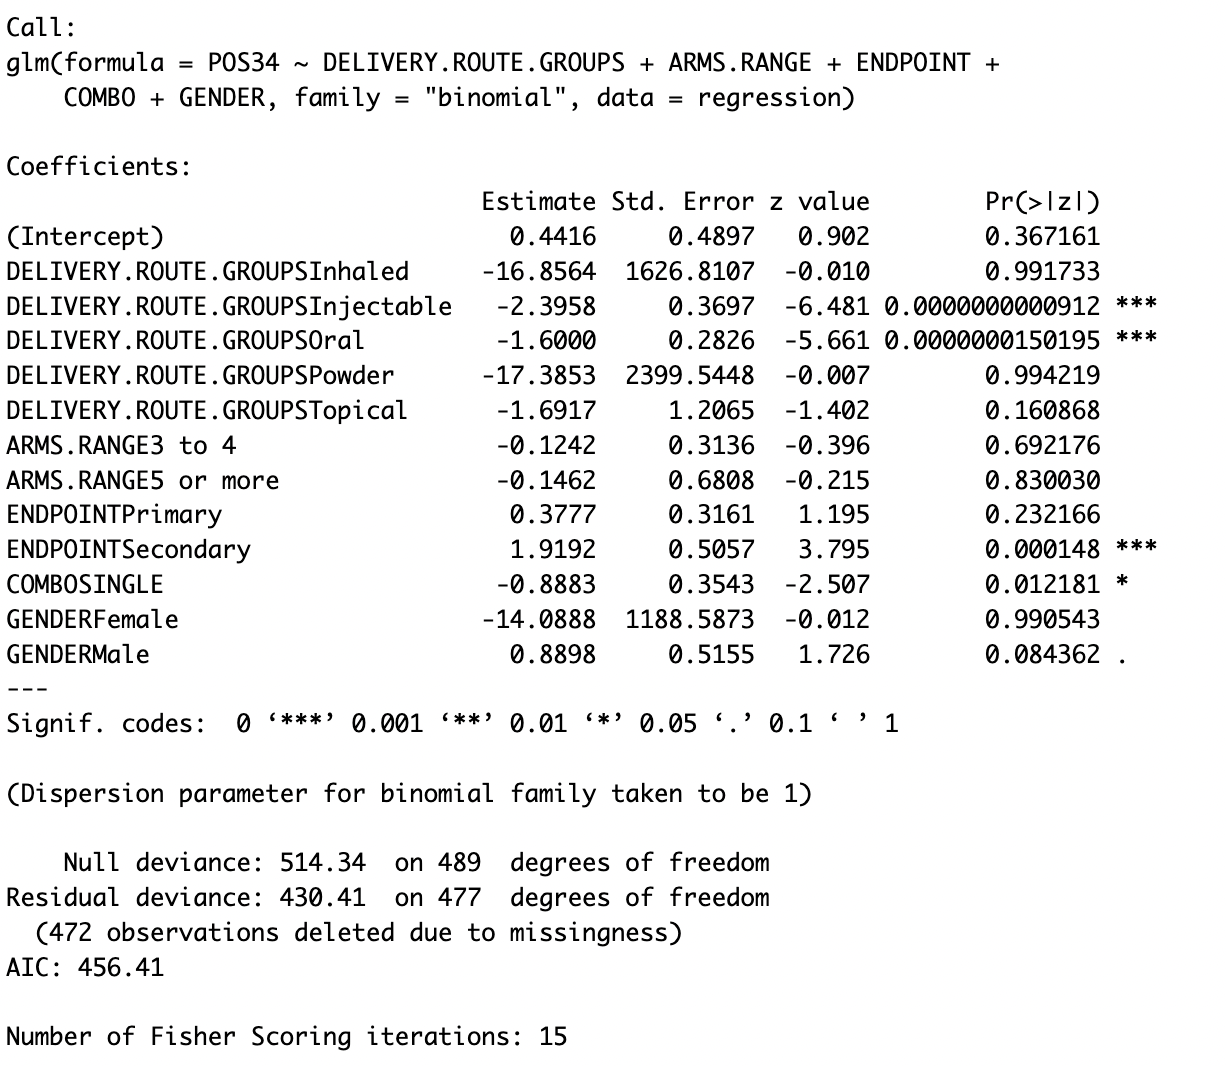

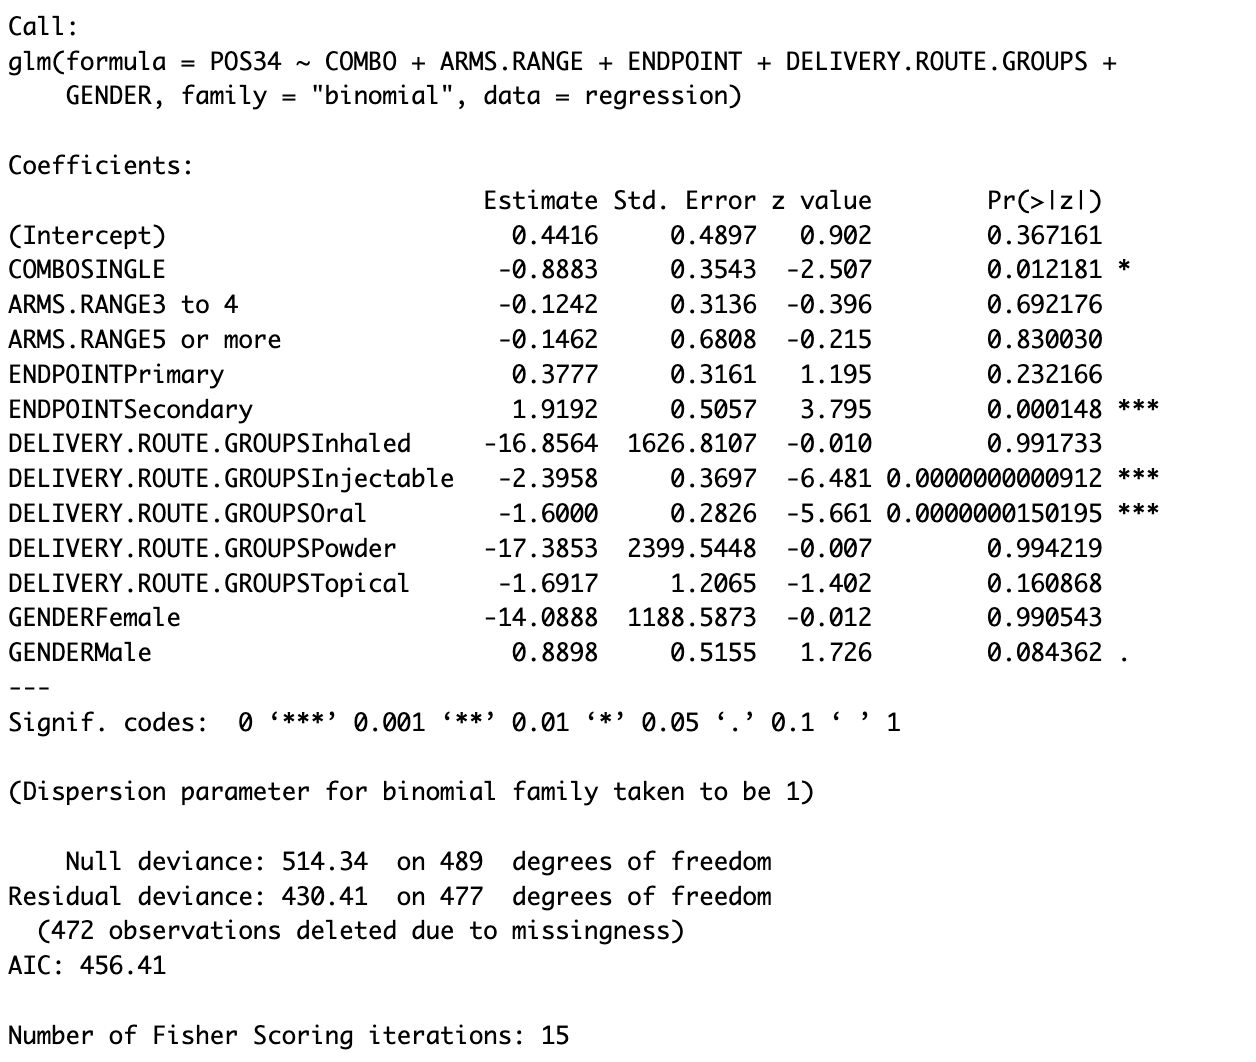

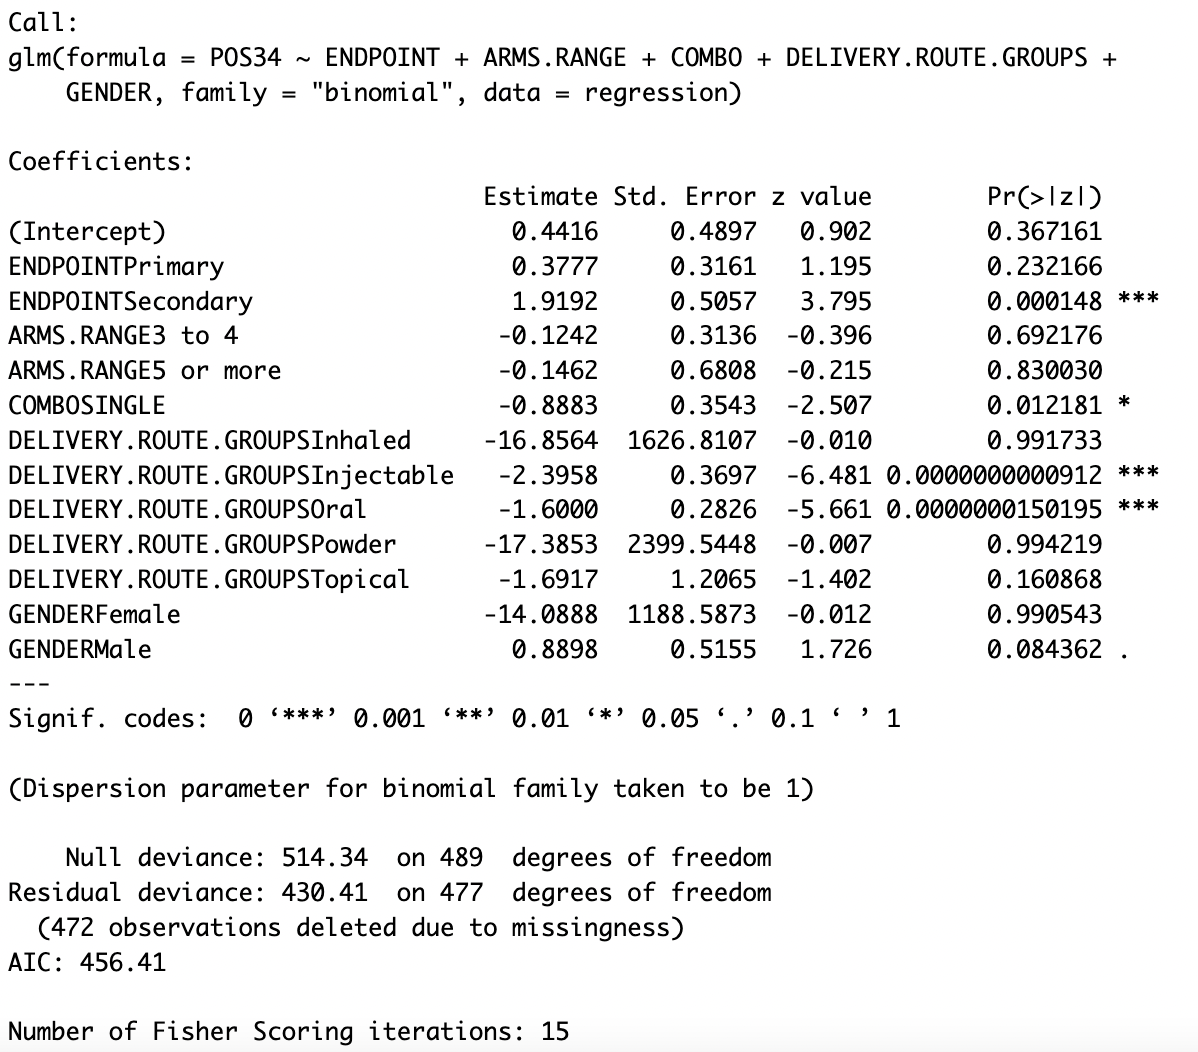

# Creating Plots/Graphs

Plots and graphs for paper

### Forest Plot

Shows the distribution of logistic regression

In [ ]:
library(tidyverse)
library(data.table)
library(ggplot2)
install.packages("forcats")
library(forcats)

# 95% confidence calculation
margin.error <- 1.96 * S.Error
upper.level <- Estimate + margin.error
lower.level <- Estimate - margin.error


# Table for Forest Plot

DELIVERY <- data.frame(Delivery=c("Inhaled", "Injectable", "Oral", "Powder", "Topical"),
                                Estimate=c(-15.66292, -2.32686, -1.49517,-15.66292, -1.48314),  
                                S.Error=c(727.69879, 0.29616, 0.22901, 1455.39754, 1.13240),
                                Pval=c(0.983, 3.94e-15, 6.631883e-11, 0.991, 0.190),
                                lower.level=c(-1441.952548, -2.907334, -1.944030, -2868.242098, -3.702644),
                                upper.level=c(1410.626708, -1.746386, -1.046310, 2836.916258, 0.736364))   


p <- 
  DELIVERY |>
  ggplot(aes(y = fct_rev(Delivery))) + 
  theme_classic()
p

p <- p +
  geom_point(aes(x=Estimate), shape=15, size=3) +
  geom_linerange(aes(xmin=lower.level, xmax=upper.level)) 
p

p <- p +
  geom_vline(xintercept = 0, linetype="dashed") +
  labs(x="Estimate", y="", title="")
p

p <- p + 
  geom_vline(xintercept = 0, linetype = "dashed") + 
  labs(
    x = "Estimate", 
    y = " ", 
    title = "Estimating the Effects of Drug Route on Drug Success" 
  ) + 
  theme(
    axis.text.y = element_text(size = 12),
    axis.text.x = element_text(size = 12),
    plot.title = element_text(hjust = 0.5, size = 12, color = "black")  
  )


### Pie Plots

Shows distribution of clinical trials in each factor

In [ ]:
# Pie Charts for Delivery Route
  
Delivery_Route <- c(38, 4, 118, 144, 5, 23)

slices_labels <- round(Delivery_Route/sum(Delivery_Route) * 100, 1)

slices_labels <- paste(slices_labels, "%", sep="")

pie(Delivery_Route, main="Delivery Route of Clinical Trials", border="white", col=myPalette, labels=slices_labels, cex=1.3)

legend("topleft", c("Multiple Routes","Inhaled","Injectable","Oral","Topical", "N/A"), cex=0.87, fill=myPalette)

In [ ]:
  # Pie Charts for Trial Arms
  
Arms <- c(727, 149, 33, 53)

slices_labels <- round(Arms/sum(Arms) * 100, 1)

slices_labels <- paste(slices_labels, "%", sep="")

pie(Arms, main="Trial Arms Distribution of Clinical Trials", border="white", col=myPalette, labels=slices_labels, cex=1.3)

legend("topright", c("1 to 2", "3 to 4", "5 or more", "N/A"), cex=1.0, fill=myPalette)

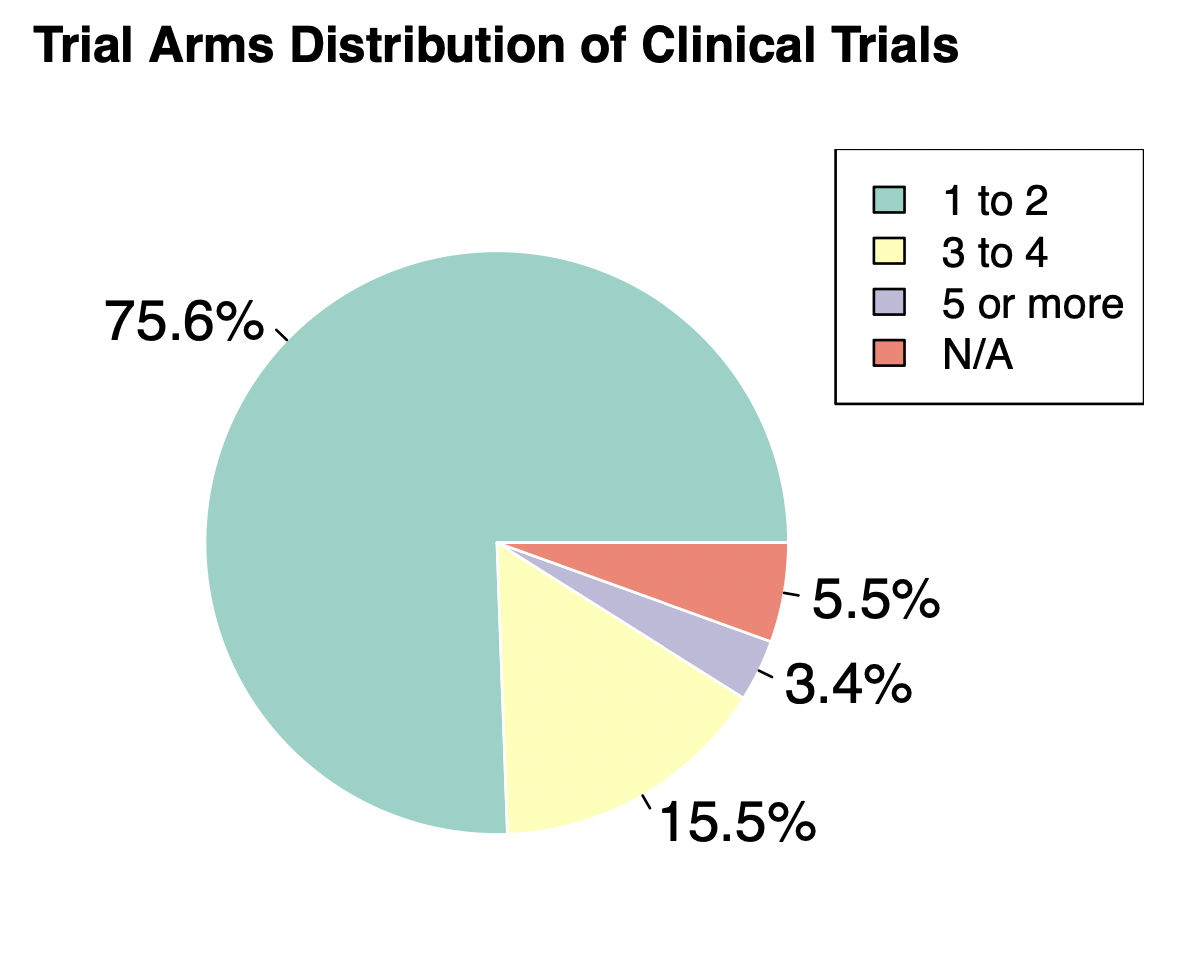

In [ ]:
# Pie Charts for Gender
  
 Gender <- c(713, 6, 28, 216)

slices_labels <- round(Gender/sum(Gender) * 100, 1)

slices_labels <- paste(slices_labels, "%", sep="")

pie(Gender, main="Gender Distribution of Clinical Trials", border="white", col=myPalette, labels=slices_labels, cex=1.3)

legend("topright", c("Both", "Female", "Male", "N/A"), cex=1.0, fill=myPalette)

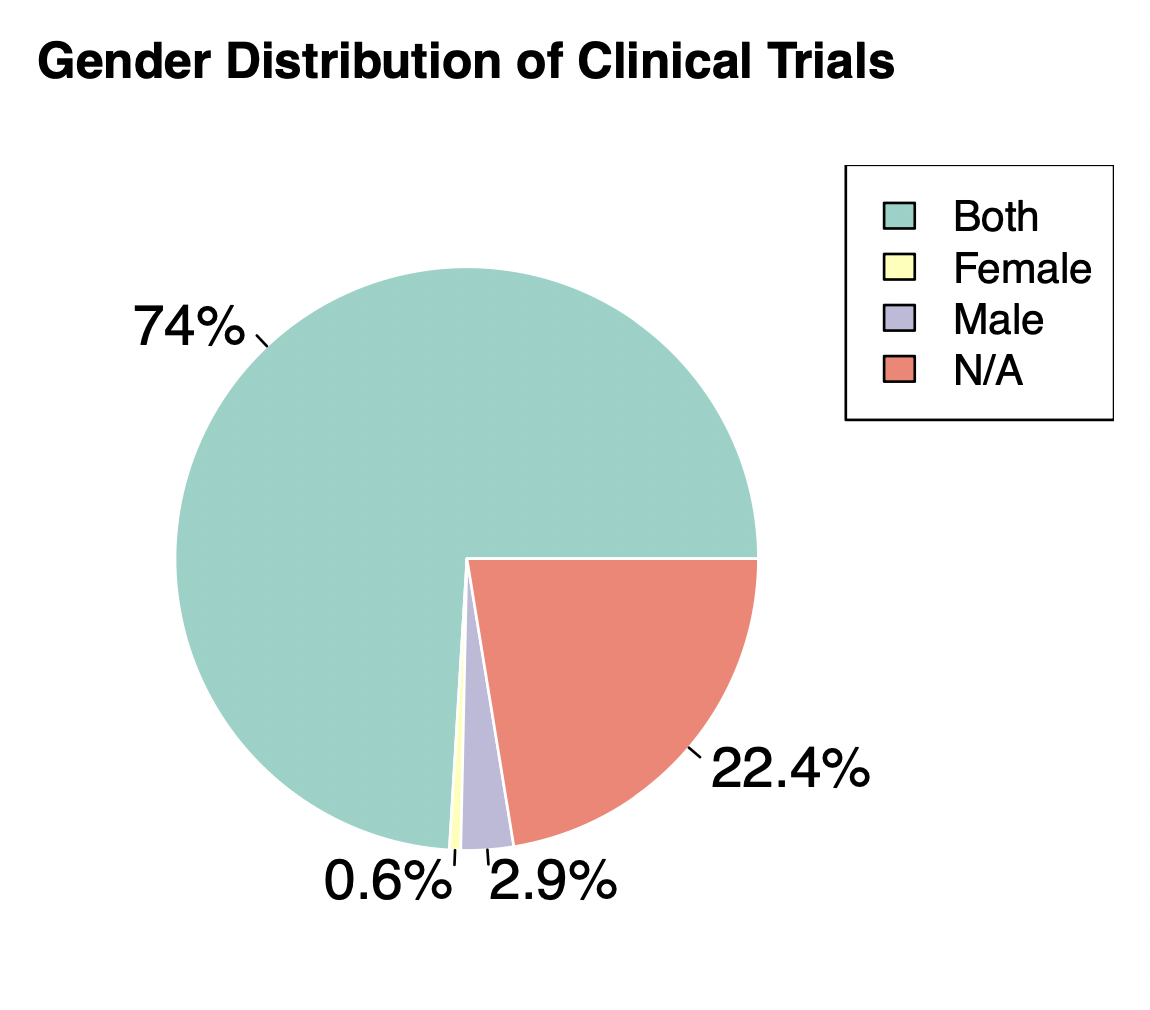

In [ ]:
 # Pie Charts for Combination drugs
  
Combo <- c(140, 823)

slices_labels <- round(Combo/sum(Combo) * 100, 1)

slices_labels <- paste(slices_labels, "%", sep="")

pie(Combo, main="Combination Drug Distribution of Clinical Trials", border="white", col=myPalette, labels=slices_labels, cex=1.3)

legend("topleft", c("Combo", "Single"), cex=1.2, fill=myPalette)


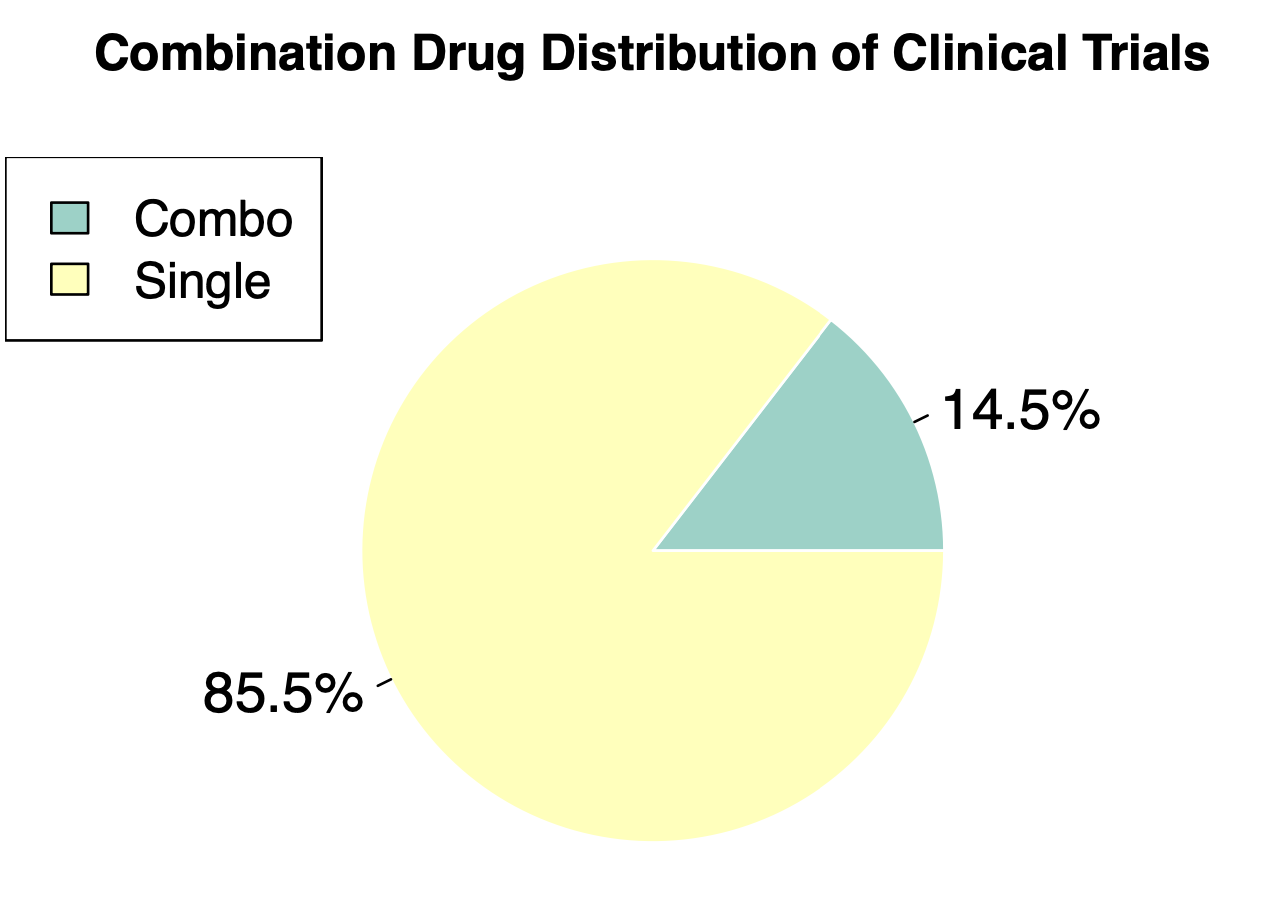

### Sankey Plot

Shows the transition of plots in each phase

In [ ]:
  # Sankey Plot

install.packages("networkD3")
library(dplyr)
library(networkD3)
library(plotly)
  
  links <- data.frame(
    source=c("Phase I", "Phase II", "Phase III"), 
    target=c("Phase II", "Phase III", "Phase IV"), 
    value=c(97, 61, 40)
  )

nodes <- data.frame(
     name=c(as.character(links$source), 
             as.character(links$target)) %>% unique()
  )
 
 links$IDsource <- match(links$source, nodes$name)-1 
 links$IDtarget <- match(links$target, nodes$name)-1
 
 print(links)

 p <- sankeyNetwork(Links = links, Nodes = nodes, Source = "IDsource", Target = "IDtarget", 
                    Value = "value", NodeID = "name", units = "TWh", fontSize = 20, nodeWidth = 30)
 
 p <- htmlwidgets::prependContent(
   p, htmltools::tags$h2("Clinical Trials in Transition", 
                         style = "text-align: center; font-weight: normal;")
 )
 
 p

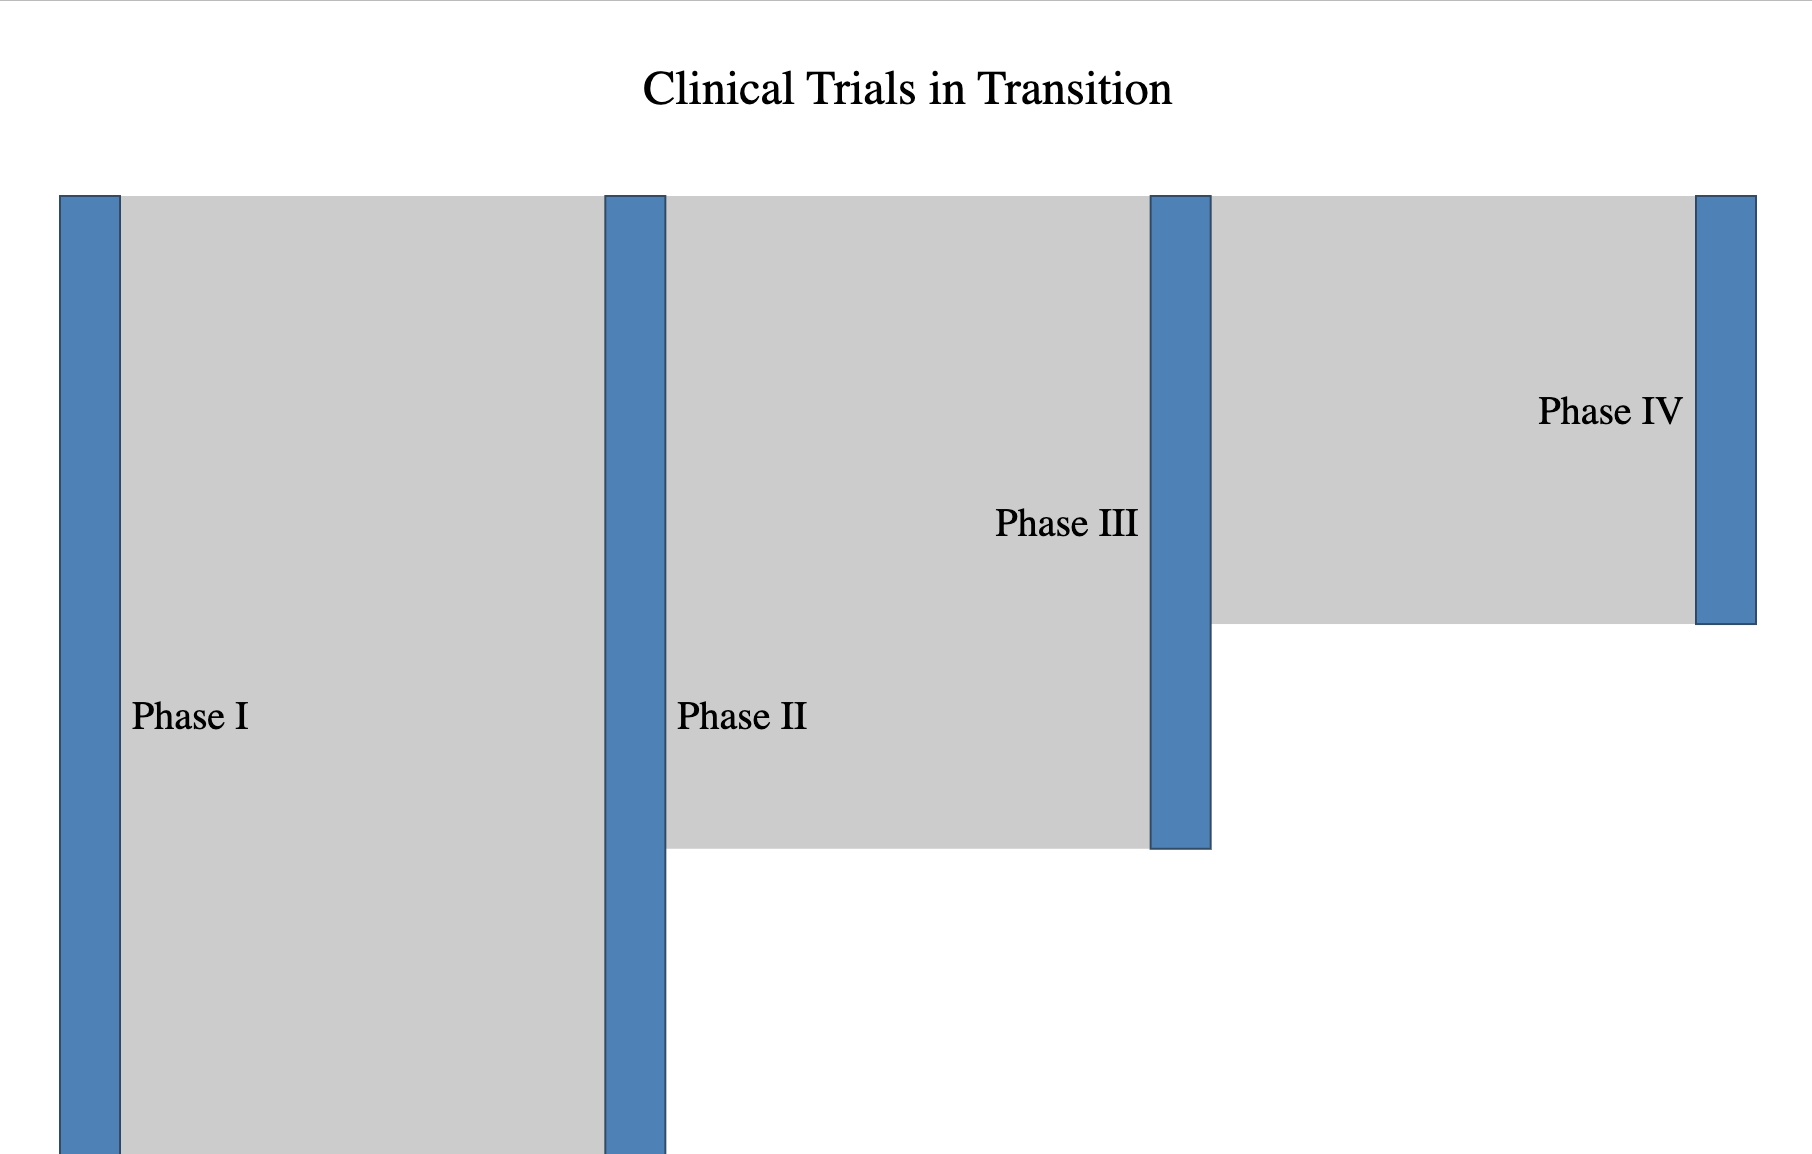

### Bar Graphs

Shows the number of clinical trials in each phase

In [ ]:
# Bar graph
  library(grid)
  library(tidyverse)
  library(shadowtext)
 
 
 names <- c("N/A", "Phase IV", "Phase III", "Phase II", "Phase I" )
 
 data <- data.frame(
   Count = c(29, 82, 137, 419, 296), 
   Phase = factor(names, levels = names),
   y = seq(length(names)) * 0.9
 )
 

 library(RColorBrewer)
 myPalette <- brewer.pal(5, "Set2")
 
 plt <- ggplot(data) +
   geom_col(aes(Count, Phase), fill = myPalette, width = 0.7) 
 
 plt <- plt +  
   scale_y_discrete(expand = expansion(add = c(0, 0.5))) +    
   geom_text(aes(x = Count, y = Phase, label = Count), hjust = 1.5, vjust = 0.5, size = 4.5) +  
 theme(
     panel.background = element_rect(fill = "white"),          
     panel.grid.major.x = element_line(color = "#A8BAC4", size = 0.3),            
     axis.line.y.left = element_line(color = "black"),          
     axis.line.x.bottom = element_line(color = "black"),      
     axis.text.y = element_text(size = 10),           
     axis.text.x = element_text(size = 10)
   ) +
   ggtitle("Number of Clinical Trials and Phase")


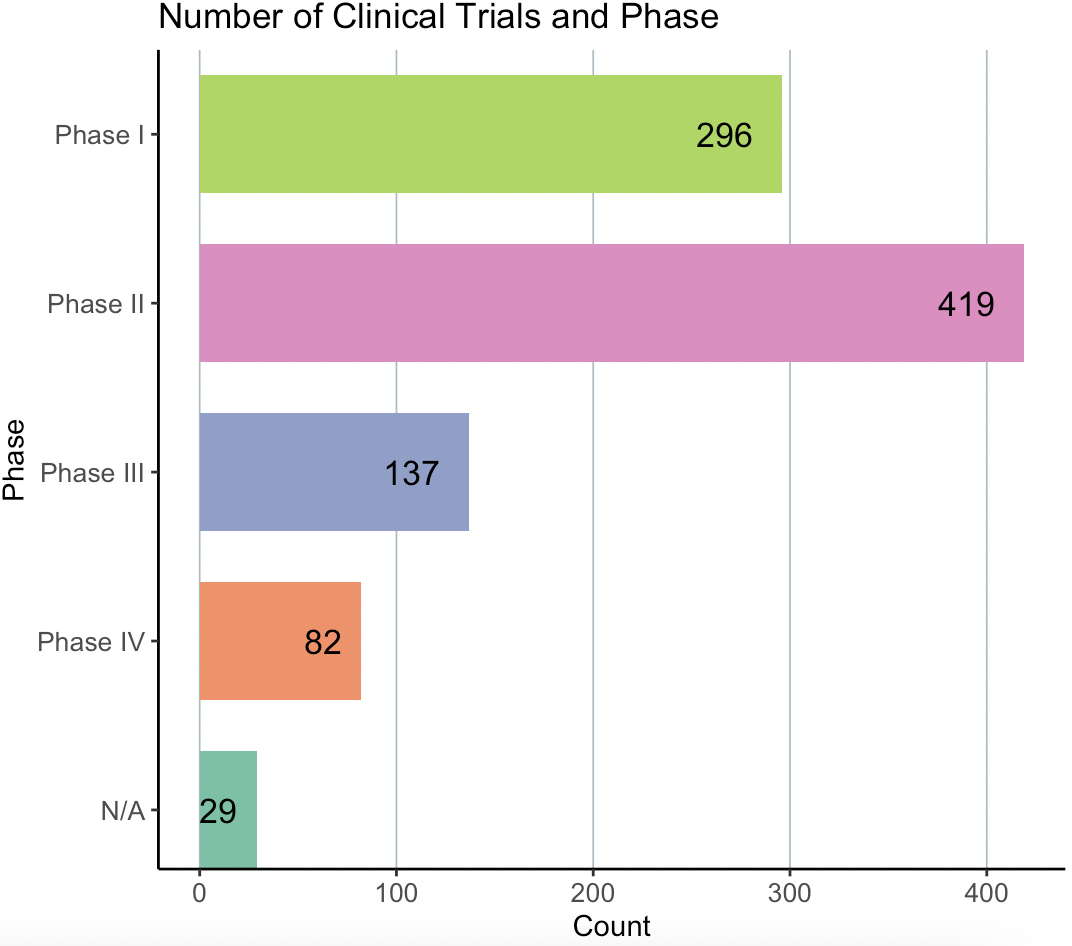